In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


uint8
[[[189 122  72   0]
  [189 122  72   0]
  [196 129  79   0]
  ...
  [189 119  70   0]
  [198 128  79   0]
  [195 125  76   0]]

 [[189 122  72   0]
  [195 128  78   0]
  [192 125  75   0]
  ...
  [195 125  76   0]
  [198 128  79   0]
  [197 127  78   0]]

 [[186 119  69   0]
  [199 132  82   0]
  [196 129  79   0]
  ...
  [195 125  77   0]
  [194 124  76   0]
  [199 129  80   0]]

 ...

 [[198 131  81   0]
  [190 123  73   0]
  [190 123  73   0]
  ...
  [193 123  76   0]
  [190 120  72   0]
  [200 130  81   0]]

 [[189 122  72   0]
  [191 124  74   0]
  [183 116  66   0]
  ...
  [198 128  79   0]
  [189 119  70   0]
  [200 130  81   0]]

 [[197 130  80   0]
  [195 129  79   0]
  [195 128  78   0]
  ...
  [196 126  77   0]
  [189 120  70   0]
  [198 128  79   0]]]


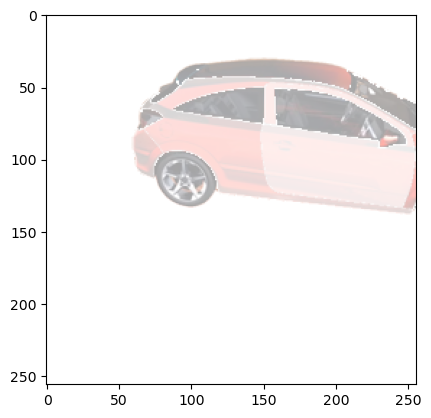

In [57]:


directory = 'D:\\DTU\\S1\\02456DeepLearning\\arrays'

# 列出目录中的所有.npy文件
npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]

# 加载第一个.npy文件进行检查
npy_data = np.load(os.path.join(directory, npy_files[1900]))

# 打印数据类型和前10个元素
print(npy_data.dtype)
print(npy_data[:10])

# 如果数据是图像，可视化它
if npy_data.ndim == 2:  # 假设图像是二维的
    plt.imshow(npy_data, cmap='gray')
    plt.show()
elif npy_data.ndim == 3:  # 假设图像是三维的（例如，彩色图像）
    plt.imshow(npy_data)
    plt.show()



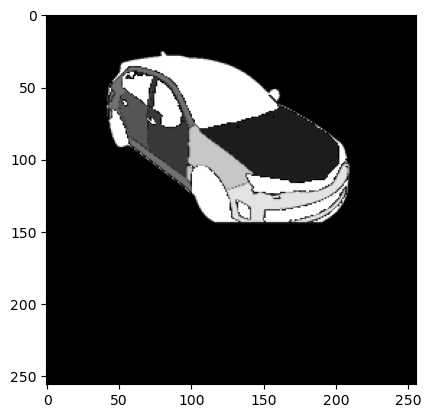

[ 0 10 20 30 40 50 60 70 80 90]


In [55]:



# 列出目录中的所有.npy文件
npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]

# 加载第一个.npy文件进行检查
npy_data = np.load(os.path.join(directory, npy_files[30]))
# 假设最后一个通道是Alpha通道
alpha_channel = npy_data[..., 3]

# 可视化Alpha通道
plt.imshow(alpha_channel, cmap='gray')
plt.show()

# 查找Alpha通道中的唯一值
unique_values = np.unique(alpha_channel)
print(unique_values)




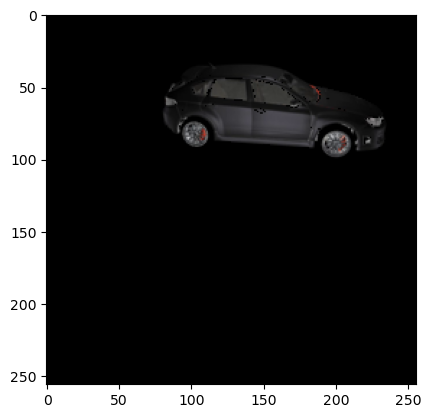

In [5]:
# 假设目标对象的掩码值不为0
object_mask = alpha_channel > 0

# 将掩码应用于原始图像（这里假设图像是RGB）
masked_image = npy_data[..., :3] * object_mask[:, :, np.newaxis]

# 显示掩码应用到原始图像后的结果
plt.imshow(masked_image)
plt.show()


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
array_folder = 'D:\\DTU\\S1\\02456DeepLearning\\arrays'  # 根据您的文件结构调整路径
image_folder = 'D:\\DTU\\S1\\02456DeepLearning\\carseg_data\\images'  # 根据您的文件结构调整路径
readme_path = 'D:\\DTU\\S1\\02456DeepLearning\\carseg_data\\README.txt'
with open(readme_path, 'r') as file:
    lines = file.readlines()
test_ids = [line.strip() for line in lines if line.strip().startswith('photo_')]

def load_data(array_folder, test_ids):
    images = []
    masks = []

    for file_name in os.listdir(array_folder):
        if file_name.endswith('.npy') and file_name not in test_ids:
            file_path = os.path.join(array_folder, file_name)
            data = np.load(file_path)

            image = data[..., :3]  # 前三个通道是图像数据
            images.append(image)

            mask_data = data[..., 3]  # 第四个通道是掩码数据
            mask = np.zeros(mask_data.shape, dtype=np.int32)
            for class_value in range(10, 100, 10):
                mask[mask_data == class_value] = class_value // 10  # 将灰度值映射到1-9的类别标签
            masks.append(mask)

    return np.array(images), np.array(masks)



X, y = load_data(array_folder, test_ids)

# 归一化图像数据到[0, 1]范围内
X_normalized = X.astype('float32') / 255.0


# 掩码数据转换为one-hot编码
num_classes = 10  # 类别总数，包括背景
y_one_hot = np.array([to_categorical(mask, num_classes=num_classes) for mask in y])

# 加载数据
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y_one_hot, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))



Training set size: 2378
Validation set size: 595


In [7]:
# print("Total .npy files in folder:", len([name for name in os.listdir(array_folder) if name.endswith('.npy')]))


In [8]:
# print("Number of test IDs:", len(test_ids))
# total_files = [f for f in os.listdir(array_folder) if f.endswith('.npy')]
# print("Total .npy files in folder:", len(total_files))

# training_files = [f for f in total_files if f not in test_ids]
# print("Total training files:", len(training_files))

# sample_file = os.path.join(array_folder, training_files[0])
# sample_data = np.load(sample_file)
# print("Shape of data in one .npy file:", sample_data.shape)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np


# 定义图像数据增强参数
data_gen_args = {
    'rotation_range': 10,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'fill_mode': 'nearest'
}

# 实例化ImageDataGenerator
image_datagen = ImageDataGenerator(**data_gen_args)
seed = 42
# 对图像数据进行数据增强
image_datagen.fit(X_train, augment=True, seed=seed)

# 创建图像的生成器
image_generator = image_datagen.flow(X_train, batch_size=16, seed=seed)

# 组合图像和掩码的生成器，掩码不应用颜色变换，只应用几何变换
def train_generator(X, y, batch_size, seed):
    image_datagen = ImageDataGenerator(**data_gen_args)
    mask_datagen = ImageDataGenerator(**data_gen_args)

    num_samples = X.shape[0]
    while True:
        # 随机选择批次数据
        batch_indexes = np.random.choice(num_samples, batch_size, replace=False)
        image_batch = X[batch_indexes]
        mask_batch = y[batch_indexes]

        # 数据增强
        seed = np.random.randint(10000)  # 确保图像和掩码使用相同的随机变换
        image_batch = image_datagen.flow(image_batch, batch_size=batch_size, seed=seed, shuffle=False).next()
        mask_batch = mask_datagen.flow(mask_batch, batch_size=batch_size, seed=seed, shuffle=False).next()

        yield image_batch, mask_batch

# 实例化训练生成器
train_gen = train_generator(X_train, y_train, batch_size=16, seed=42)

# 这个生成器现在可以用于模型的fit方法中
# model.fit(train_gen, steps_per_epoch=len(X_train) // 32, epochs=50)

for img_batch, mask_batch in train_gen:
    print("Image batch shape:", img_batch.shape)
    print("Mask batch shape:", mask_batch.shape)
    break  # 只检查第一个批次
import matplotlib.pyplot as plt

img_batch, mask_batch = next(train_gen)
plt.figure(figsize=(12, 6))

for i in range(5):  # 展示前三个样本
    plt.subplot(2, 3, i+1)
    plt.imshow(img_batch[i])
    plt.title("Image")

    plt.subplot(2, 3, i+4)
    plt.imshow(np.argmax(mask_batch[i], axis=-1), cmap='gray')
    plt.title("Mask")

plt.show()



In [33]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def conv_block(input_tensor, num_filters):
    """构建卷积块"""
    x = Conv2D(num_filters, (3, 3), padding='same', activation='relu')(input_tensor)
    x = Conv2D(num_filters, (3, 3), padding='same', activation='relu')(x)
    return x

def unet_plus_plus(input_size=(256, 256, 3), num_classes=10, dropout_rate=0.5):
    inputs = Input(input_size)
    
    # 第一层下采样
    conv1 = conv_block(inputs, 32)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = Dropout(dropout_rate)(pool1)
    
    # 第二层下采样
    conv2 = conv_block(pool1, 64)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = Dropout(dropout_rate)(pool2)
    
    # 第三层下采样
    conv3 = conv_block(pool2, 128)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = Dropout(dropout_rate)(pool3)
    
    # 第四层下采样
    conv4 = conv_block(pool3, 256)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    pool4 = Dropout(dropout_rate)(pool4)

    # 中间层
    convm = conv_block(pool4, 512)
    
    # 第一层上采样
    deconv4 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = conv_block(uconv4, 256)
    
    # 第二层上采样
    deconv3 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = conv_block(uconv3, 128)
    
    # 第三层上采样
    deconv2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = conv_block(uconv2, 64)
    
    # 第四层上采样
    deconv1 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = conv_block(uconv1, 32)
    
    # 输出层
    output_layer = Conv2D(num_classes, (1, 1), padding='same', activation='softmax')(uconv1)
    
    model = Model(inputs=inputs, outputs=output_layer)
    
    return model

# 创建UNet++模型
model = unet_plus_plus(input_size=(256, 256, 3), num_classes=10, dropout_rate=0.5)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_126 (Conv2D)            (None, 256, 256, 32  896         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_127 (Conv2D)            (None, 256, 256, 32  9248        ['conv2d_126[0][0]']             
                                )                                                           

In [25]:
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


y_train shape: (2378, 256, 256, 10)
y_val shape: (595, 256, 256, 10)


In [26]:
for img_batch, mask_batch in train_gen:
    print("Image batch shape:", img_batch.shape)
    print("Mask batch shape:", mask_batch.shape)
    break  # 只检查第一个批次


Image batch shape: (16, 256, 256, 3)
Mask batch shape: (16, 256, 256, 10)


In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# 定义模型保存路径
checkpoint_path = "D:\\DTU\\S1\\02456DeepLearning\\carseg_data\\checkpoint3.h5"

# 创建回调函数
callbacks = [
    ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss', mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, mode='min', verbose=1)
]

# 训练模型
model.fit(
    train_gen,
    steps_per_epoch=len(X_train) // 16,
    epochs=150,
    callbacks=callbacks,
    batch_size=16,
    validation_data=(X_val, y_val)  # 假设您已经有了验证集 X_val 和 y_val
)


Epoch 1/150
148/148 [==============================] - ETA: 0s - loss: 0.9856 - accuracy: 0.8351
Epoch 1: val_loss improved from inf to 0.52490, saving model to D:\DTU\S1\02456DeepLearning\carseg_data\checkpoint3.h5
148/148 [==============================] - 592s 4s/step - loss: 0.9856 - accuracy: 0.8351 - val_loss: 0.5249 - val_accuracy: 0.8445 - lr: 1.0000e-04
Epoch 2/150
148/148 [==============================] - ETA: 0s - loss: 0.3712 - accuracy: 0.8745
Epoch 2: val_loss improved from 0.52490 to 0.39767, saving model to D:\DTU\S1\02456DeepLearning\carseg_data\checkpoint3.h5
148/148 [==============================] - 588s 4s/step - loss: 0.3712 - accuracy: 0.8745 - val_loss: 0.3977 - val_accuracy: 0.8994 - lr: 1.0000e-04
Epoch 3/150
148/148 [==============================] - ETA: 0s - loss: 0.2932 - accuracy: 0.9106
Epoch 3: val_loss did not improve from 0.39767
148/148 [==============================] - 590s 4s/step - loss: 0.2932 - accuracy: 0.9106 - val_loss: 0.4145 - val_accurac

In [35]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# 加载测试数据的函数
def load_test_data(array_folder, test_ids):
    test_images = []
    test_masks = []

    for file_name in test_ids:
        file_path = os.path.join(array_folder, file_name)
        if os.path.isfile(file_path):
            data = np.load(file_path)

            image = data[..., :3]  # 前三个通道是图像数据
            test_images.append(image)

            mask_data = data[..., 3]  # 第四个通道是掩码数据
            mask = np.zeros(mask_data.shape, dtype=np.int32)
            for class_value in range(10, 100, 10):
                mask[mask_data == class_value] = class_value // 10
            test_masks.append(mask)

    return np.array(test_images), np.array(test_masks)

# 加载测试数据
X_test, y_test = load_test_data(array_folder, test_ids)

# 归一化测试图像数据
X_test_normalized = X_test.astype('float32') / 255.0

# 转换测试掩码数据为one-hot编码
y_test_one_hot = np.array([to_categorical(mask, num_classes=10) for mask in y_test])

# 加载模型
model = load_model('D:\\DTU\\S1\\02456DeepLearning\\carseg_data\\checkpoint3.h5')


print("test set size:", len(X_test))


# 评估模型
loss, accuracy = model.evaluate(X_test_normalized, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


test set size: 30
1/1 [==============================] - 2s 2s/step - loss: 1.4687 - accuracy: 0.6334
Test Loss: 1.468734622001648
Test Accuracy: 0.6333526372909546


1/1 [==============================] - 0s 222ms/step
IoU for the sample:  0.6678040397333116


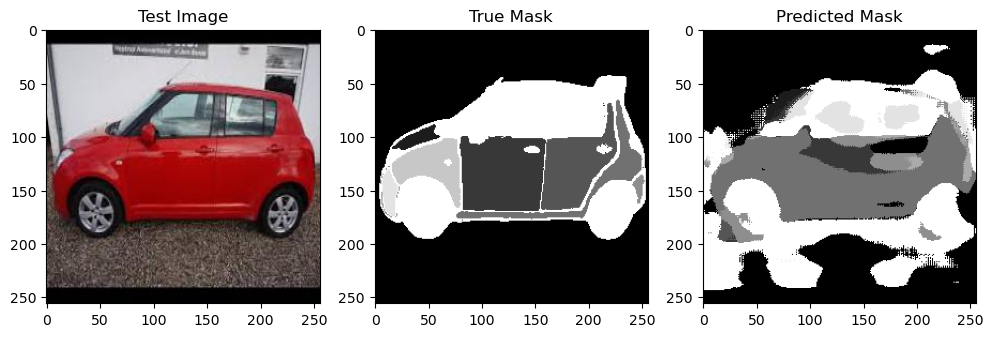

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import jaccard_score

# 定义计算 IoU 的函数
def calculate_iou(y_true, y_pred, smooth=1e-6):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou_score = np.sum(intersection) / (np.sum(union) + smooth)
    return iou_score

# 加载模型
model = load_model('D:\\DTU\\S1\\02456DeepLearning\\carseg_data\\checkpoint3.h5')

# 从测试集中选择一个样本进行预测
sample_test_image = X_test_normalized[12]
sample_test_mask = y_test_one_hot[12]

# 模型预测
predicted_mask = model.predict(np.expand_dims(sample_test_image, axis=0))[0]

# 计算 IoU
iou = calculate_iou(np.argmax(sample_test_mask, axis=-1), np.argmax(predicted_mask, axis=-1))
print("IoU for the sample: ", iou)

# 可视化真实掩码和预测掩码
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Test Image")
plt.imshow(sample_test_image)

plt.subplot(1, 3, 2)
plt.title("True Mask")
plt.imshow(np.argmax(sample_test_mask, axis=-1), cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Predicted Mask")
plt.imshow(np.argmax(predicted_mask, axis=-1), cmap='gray')

plt.show()


1/1 [==============================] - 1s 764ms/step


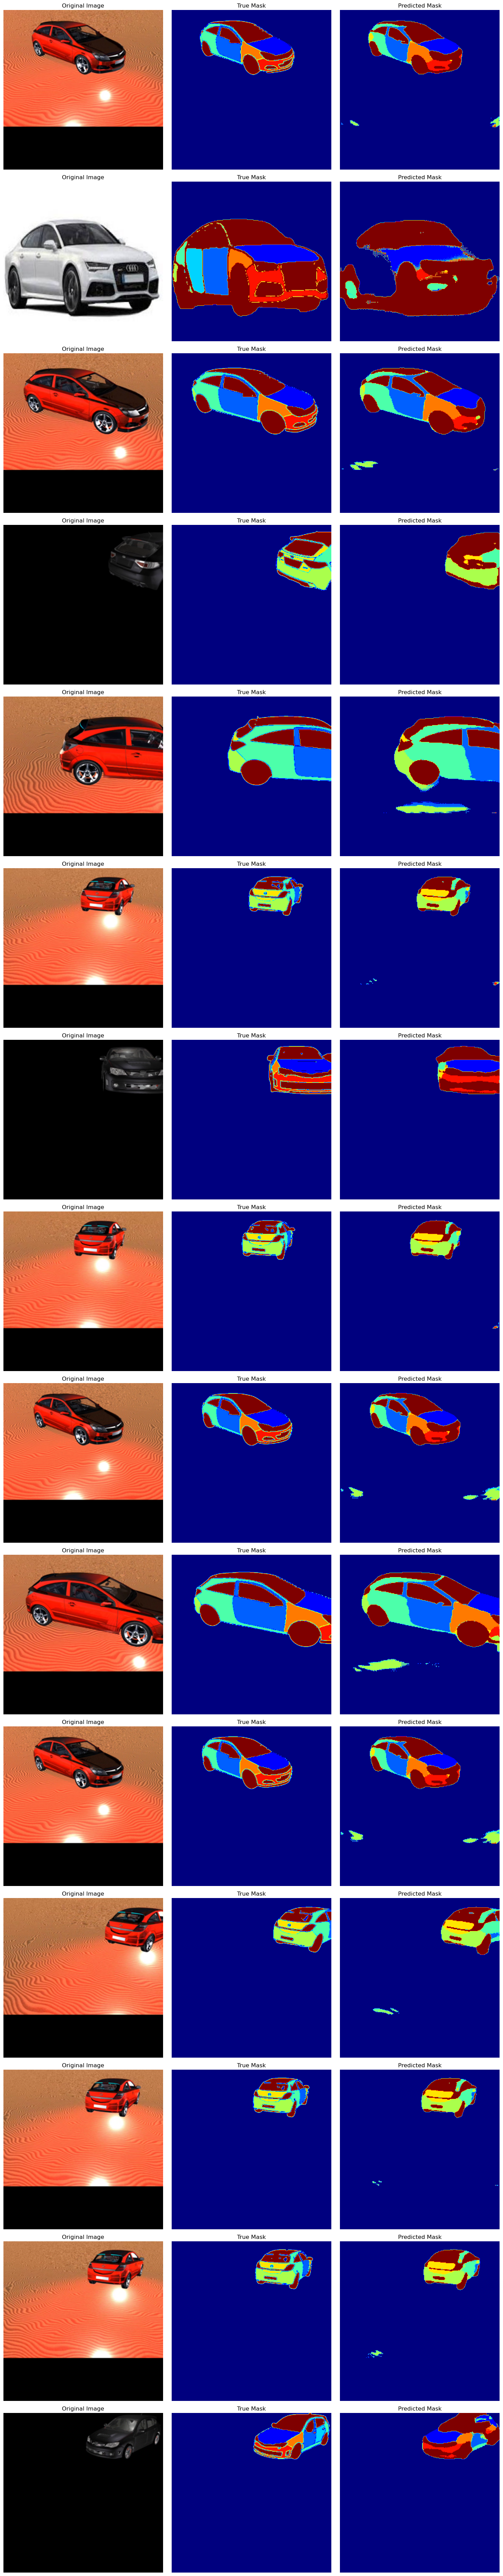

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(model, X, y, num_images=3):
    """
    可视化模型的预测结果。
    
    :param model: 已训练的模型。
    :param X: 图像数据。
    :param y: 真实的掩码。
    :param num_images: 要可视化的图像数量。
    """
    preds = model.predict(X[:num_images])
    fig, axes = plt.subplots(num_images, 3, figsize=(15, 5*num_images))

    for i in range(num_images):
        # 原始图像
        axes[i, 0].imshow(X[i])
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')
        
        # 真实掩码
        true_mask = np.argmax(y[i], axis=-1)
        axes[i, 1].imshow(true_mask, cmap='jet')
        axes[i, 1].set_title('True Mask')
        axes[i, 1].axis('off')
        
        # 预测掩码
        pred_mask = np.argmax(preds[i], axis=-1)
        axes[i, 2].imshow(pred_mask, cmap='jet')
        axes[i, 2].set_title('Predicted Mask')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

#  model 是训练模型，X_val 和 y_val 分别是您的验证集图像和掩码
plot_predictions(model, X_val, y_val, num_images=15)
